# Check if A Random Variable is Normally Distributed

In [1]:
import pandas as pd

In [2]:
xl = pd.ExcelFile('distrib.xls')
# xl.sheet_names
df = xl.parse('Лист1')
df.head()

,No,La,LN,Ch,Un,Nl,Ls,C3,U3,Lo
0,2.638118,1.559936,5.796803,2.106319,2.388562,-2.891846,2.194869,2.883311,5.818445,70.021492
1,2.939677,1.106321,3.120341,5.040086,2.757530,-2.356624,0.835470,4.318595,5.773400,114.122601
2,2.036079,1.202140,23.299866,3.966322,3.585284,-2.740712,3.455526,12.033311,3.758904,102.786300
3,4.073466,1.192179,9.952675,3.882852,2.892209,0.038125,0.599163,17.623683,3.209204,9.499374
4,4.673323,1.839849,4.193463,2.971356,3.083651,2.085697,0.028275,6.324346,3.087344,39.115391


Are values of random variable __Ch__ normally distributed?

In [3]:
X = df[['Ch']].values
len(X)

300

In [4]:
import matplotlib.pyplot as plt
plt.hist(X,bins=30)
plt.show()

<Figure size 640x480 with 1 Axes>

it looks like normal distribution.

Let's find outlayers using boxplot

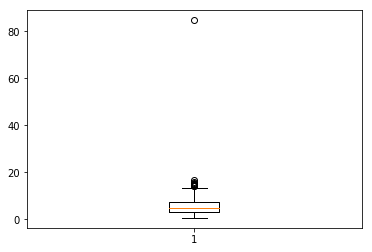

In [5]:
plt.boxplot(X)
plt.show()

Clearly, there is one outlier. It is far above whiskers.

In [6]:
X.max()

84.6654321

In [7]:
X = X[X<20]

In [8]:
# bin size
step = 1
n_of_bins = int((X.max() - X.min())/step)

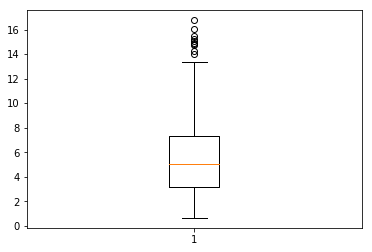

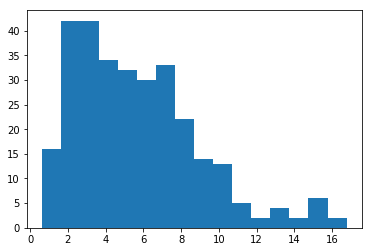

In [9]:
plt.boxplot(X)
plt.show()
plt.hist(X, bins=n_of_bins)
plt.show()

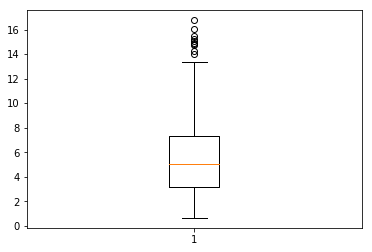

In [10]:
z = plt.boxplot(X)
plt.show()

In [11]:
whiskers = z['whiskers']
top_whisker = whiskers[1]
top_whisker.__dict__

{'_stale': False,
 'stale_callback': <function matplotlib.artist._stale_axes_callback(self, val)>,
 '_axes': <matplotlib.axes._subplots.AxesSubplot at 0x11a833b38>,
 'figure': <Figure size 432x288 with 1 Axes>,
 '_transform': <matplotlib.transforms.CompositeGenericTransform at 0x11a878b00>,
 '_transformSet': True,
 '_visible': True,
 '_animated': False,
 '_alpha': None,
 'clipbox': <matplotlib.transforms.TransformedBbox at 0x11a8aa748>,
 '_clippath': None,
 '_clipon': True,
 '_label': '_line2',
 '_picker': None,
 '_contains': None,
 '_rasterized': None,
 '_agg_filter': None,
 '_mouseover': False,
 'eventson': False,
 '_oid': 0,
 '_propobservers': {},
 '_remove_method': <function matplotlib.axes._base._AxesBase.add_line.<locals>.<lambda>(h)>,
 '_url': None,
 '_gid': None,
 '_snap': None,
 '_sketch': None,
 '_path_effects': [],
 '_sticky_edges': _XYPair(x=[], y=[]),
 '_dashcapstyle': 'butt',
 '_dashjoinstyle': 'round',
 '_solidjoinstyle': 'round',
 '_solidcapstyle': 'projecting',
 '_line

In [12]:
top_box_border_y = top_whisker.get_ydata()[0]
top_whisker_y = top_whisker.get_ydata()[1]

Let's remove values above top whisker.

In [13]:
X = X[X<top_whisker_y]

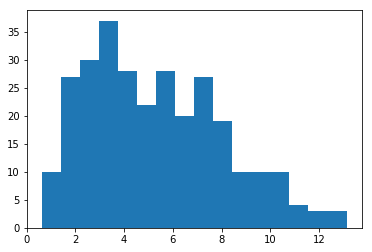

In [14]:
plt.hist(X, bins=n_of_bins)
plt.show()

This resembles normal distribution even better.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


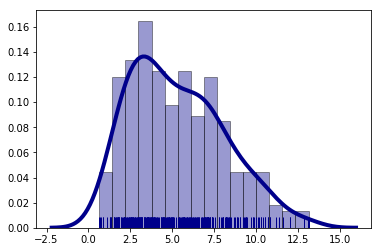

In [15]:
import seaborn as sns
sns.distplot(X, hist=True, kde=True, rug = True,
             bins=n_of_bins, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.show()

Visually, this can be considered as normal. However, let's test the hypothesis formally.

In [16]:
from scipy import stats
k2, p = stats.normaltest(X)
alpha = 0.01
print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")


p = 0.000446365
The null hypothesis can be rejected


Theoretically, it is 99% chance that it is __not__ in fact a normally distributed random variable. ??

Finding out if it fits to normal scale. (It should be close to the red line)

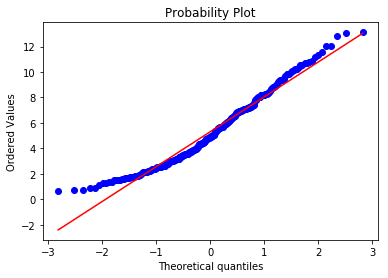

In [17]:
import pylab 
import scipy.stats as stats

stats.probplot(X, dist="norm", plot=pylab)
pylab.show()

## Shapiro-Wilk

Perform the Shapiro-Wilk test for normality.

The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.

In [33]:
import scipy.stats as stats
p_value = stats.shapiro(X)[1] # : float
# The p-value for the hypothesis test.
p_value

1.23890833947371e-06

Such p-value means that the distribution is not even close to be Normal.

# Misc

In [19]:
xl = pd.ExcelFile("kaffee.xls")
xl.sheet_names

['Лист1']

In [20]:
df = xl.parse("Лист1")
df.head()

,menge,preis,nummer,marke,dauer,alter,klasse,einkm,persn,prbew,bildg,treue
1,1,1,1,4,11,2,5,1,2,1,2,1
2,2,2,8,8,13,2,2,3,4,4,3,1
3,1,3,14,9,24,2,1,4,4,4,3,2
4,1,2,17,1,57,4,4,2,1,1,2,2
5,1,3,20,7,15,3,4,2,2,1,3,1


We are using $\chi^2$ criterium to check if random variables are dependant or not.

$$\hat\chi^2_{(N-1)(M-1)}=\sum_i^N\sum_j^M\frac{(n_{ij}-\hat n_{ij})^2}{\hat n_{ij}}$$

$$\text{freedom levels}= N\cdot M -1 - (M-1) -(N-1)=(N-1)(M-1)$$

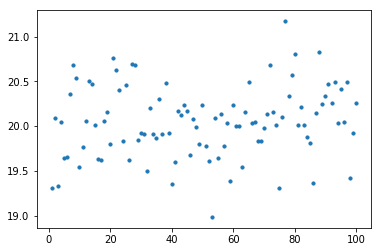

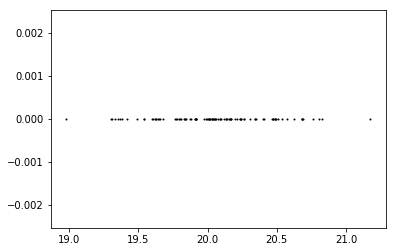

p = 0.936987
The null hypothesis cannot be rejected


In [21]:
# df[['preis', 'marke']]
import numpy as np
import matplotlib.pyplot as plt
ksi = np.random.normal(20, .4, 100)
plt.scatter(np.arange(1, 101, 1), ksi, s = 10)
plt.show()
plt.scatter(ksi, np.zeros(100), s=1, c='black')
plt.show()
from scipy import stats
k2, p = stats.normaltest(ksi)
alpha = 0.001
print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")


In [22]:
mu, sigma = 0, 1
X1 = np.random.normal(mu, sigma, 100)
X2 = np.random.normal(2, sigma, 100)

In [23]:
y = 3 + 2*X1 - X2 + np.random.normal(0, .25, 100)

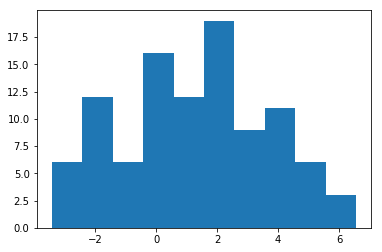

In [24]:
plt.hist(y)
plt.show()

In [25]:
np.corrcoef([y, X1, X2])

array([[ 1.        ,  0.89961152, -0.52750959],
       [ 0.89961152,  1.        , -0.11615453],
       [-0.52750959, -0.11615453,  1.        ]])

In [26]:
from scipy.stats.stats import pearsonr
pearsonr(y, X1)

(0.899611524543417, 4.866656436721634e-37)

In [27]:
df = pd.DataFrame(np.concatenate([y[:,None], X1[:,None], X2[:,None]], axis=1))
df[[0,1]][:5].values

array([[ 2.35975037,  0.86432956],
       [-1.81985037, -1.30081567],
       [-0.45969732, -0.57198526],
       [ 2.8003795 ,  0.61009165],
       [-1.84200494, -0.94912083]])

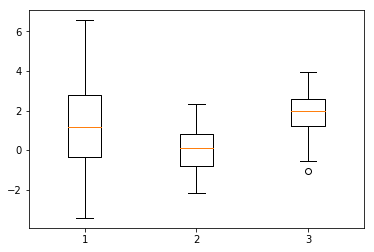

In [28]:
plt.boxplot([y, X1, X2])
plt.show()

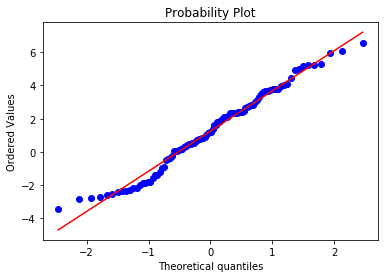

In [29]:
import numpy as np 
import pylab 
import scipy.stats as stats

stats.probplot(df[0], dist="norm", plot=pylab)
pylab.show()

In [30]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(df[[0,1]].values, y)

# reg.score(X1[:,None], y)

print(reg.coef_, reg.intercept_) 

[ 1.00000000e+00 -1.48899914e-16] 1.1102230246251565e-15


In [31]:
print(np.linspace(1, 100, 100)) # start, stop, number of points
np.arange(1,100 + 1,1) # like range(1,101, 1)

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100.]


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])